# Image and XML Representations in SAP-SAM
This notebook provides a brief tutorial on how to access image and XML representation of SAP-SAM models.
In particular, images can be generated using the REST API of SAP Signavio Process Manager (academic edition) and the XML files of the SAP-SAM BPMN 2.x diagrams (with a handful of exceptions) have been published with the January 2023 update of SAP-SAM.

## Setup
In order to render images or generate BPMN 2.x XML files, we need to create an account on [academic.signavio.com](academic.signavio.com) or on a commercial SAP Signavio system instance. To setup the integration with your SAP Signavio workspace, we create a file named ``conf.py`` in the `notebooks` directory of this project and specify the following variables:

* ``email``: the email address with which you have registered your account.
* ``pw``: your password -- use a password you do not use elsewhere and do not commit/share the ``conf.py`` file.
* ``tenant_id``: the ID of your workspace, which can obtain by selecting **Help** - **Workspace information** in the explorer of SAP Signavio Process Manager.
* ``system_instance``: ``'https://academic.signavio.com'`` or the URL of a commercial system instance.

Below, we see an example configuration file:

```
email = 'jane@doe.org'
pw = '1234546'
tenant_id = 'cb0f0496e0ca1234562e881f9f654321'
system_instance = https://academic.signavio.com
```

This allows the underlying code to upload diagrams to a specific folder (named `SAP-SAM`) in your workspace so that the server can generate an image (PNG) or XML representation.
The folder does not need to be created manually (the SAP-SAM API takes care of this).

We import the following dependencies to get started:

In [1]:
from IPython.display import Image, display
import json
import pandas as pd
pd.set_option("display.min_rows", 4)
from sapsam import parser, constants
from sapsam.ImageGenerator import ImageGenerator

## Loading SAP-SAM Content
Let us now load a SAP-SAM model (in JSON format) that we want to turn into a graphical model (PNG) and into a standard-compliant BPMN 2.0 XML file:

In [2]:
csv_paths = parser.get_csv_paths()
csv_path = csv_paths[0]
df_raw = pd.read_csv(csv_path, nrows=20)
df_raw
model_json = df_raw["Model JSON"][15]

In addition, we need the model's namespace and name:

In [3]:
model_namespace = df_raw["Namespace"][15]
# If the name cannot be obtained, the diagram can be named manually or by using a dummy label
model_name = json.loads(model_json)['properties']['name']
print('Namespace:', model_namespace)
print('Name:', model_name)

Namespace: http://b3mn.org/stencilset/bpmn2.0#
Name:  Observe vaccinee


## Rendering Images
Now, we can use the SAP-SAM API to create the diagram in SAP Signavio Process Manager and have it generate the image:

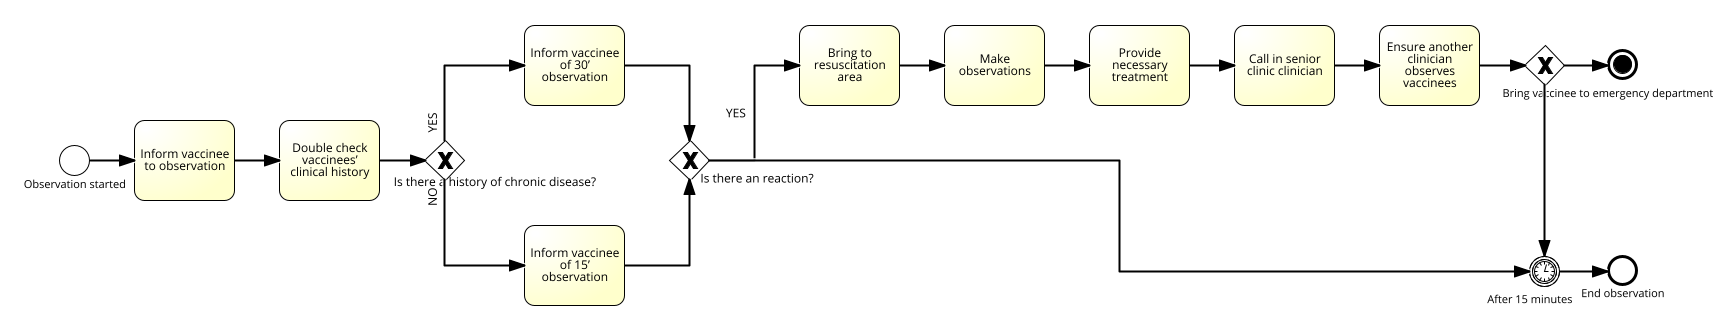

In [4]:
gen = ImageGenerator()
image_request = gen.generate_image(model_name, model_json, model_namespace)
display(Image(image_request))

Note that the diagram has been stored in the `SAP-SAM` folder fo the SAP Signavio workspace and needs to be deleted manually, if desired.

## Generating XML Files
We can generate XML files in an analogous manner:

In [5]:
xml_request = gen.generate_xml(model_name, model_json, model_namespace)
print(xml_request)

b'<?xml version="1.0" encoding="UTF-8"?><definitions xmlns="http://www.omg.org/spec/BPMN/20100524/MODEL" xmlns:bpmndi="http://www.omg.org/spec/BPMN/20100524/DI" xmlns:omgdc="http://www.omg.org/spec/DD/20100524/DC" xmlns:omgdi="http://www.omg.org/spec/DD/20100524/DI" xmlns:signavio="http://www.signavio.com" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" exporter="Signavio Process Editor, http://www.signavio.com" exporterVersion="16.11.1" expressionLanguage="http://www.w3.org/TR/XPath" id="sid-fdb39999-0c32-4de3-9514-3d461295e432" name=" Observe vaccinee" targetNamespace="http://www.signavio.com" typeLanguage="http://www.w3.org/2001/XMLSchema" xsi:schemaLocation="http://www.omg.org/spec/BPMN/20100524/MODEL http://www.omg.org/spec/BPMN/2.0/20100501/BPMN20.xsd">\n   <process id="sid-4eaffd9f-5311-4b4c-ab03-9e1765e97451" isClosed="false" isExecutable="false" name=" Observe vaccinee" processType="None">\n      <extensionElements>\n         <signavio:signavioDiagramMetaData metaKey="pr